# NEVI

The NEVI project aims to rise the bar for skin cancer recognition using image processing and deep convolutional neural networks with transfer learning.

In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.resnet_v2 import ResNet101V2, preprocess_input
from keras.applications.efficientnet_v2 import EfficientNetV2S, preprocess_input
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.layers import ThresholdedReLU
from keras.models import load_model
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import PIL


By Type

In [2]:
TYPE_DATA_FOLDER_PATH  = "grouped_images_by_type"
AKIEC_DATA_FOLDER_PATH = "grouped_images_by_type\\akiec\\*"
BCC_DATA_FOLDER_PATH   = "grouped_images_by_type\\bcc\\*"
BKL_DATA_FOLDER_PATH   = "grouped_images_by_type\\bkl\\*"
DF_DATA_FOLDER_PATH    = "grouped_images_by_type\\df\\*"
MEL_DATA_FOLDER_PATH   = "grouped_images_by_type\\mel\\*"
NV_DATA_FOLDER_PATH    = "grouped_images_by_type\\nv\\*"
VASC_DATA_FOLDER_PATH  = "grouped_images_by_type\\vasc\\*"
AKIEC_DATA_FOLDER_PATH_TEST = "secret_test_folder\\akiec\\*"
BCC_DATA_FOLDER_PATH_TEST   = "secret_test_folder\\bcc\\*"
BKL_DATA_FOLDER_PATH_TEST   = "secret_test_folder\\bkl\\*"
DF_DATA_FOLDER_PATH_TEST    = "secret_test_folder\\df\\*"
MEL_DATA_FOLDER_PATH_TEST   = "secret_test_folder\\mel\\*"
NV_DATA_FOLDER_PATH_TEST    = "secret_test_folder\\nv\\*"
VASC_DATA_FOLDER_PATH_TEST  = "secret_test_folder\\vasc\\*"
TARGET_SIZE = (256, 256)
INPUT_SHAPE = (256, 256, 3)
BATCH_SIZE = 20

In [3]:
imgs_AKIEC  = glob.glob(AKIEC_DATA_FOLDER_PATH)
imgs_BCC    = glob.glob(BCC_DATA_FOLDER_PATH)
imgs_BKL    = glob.glob(BKL_DATA_FOLDER_PATH)
imgs_DF     = glob.glob(DF_DATA_FOLDER_PATH)
imgs_MEL    = glob.glob(MEL_DATA_FOLDER_PATH)
imgs_NV     = glob.glob(NV_DATA_FOLDER_PATH)
imgs_VASC   = glob.glob(VASC_DATA_FOLDER_PATH)

test_imgs_AKIEC  = glob.glob(AKIEC_DATA_FOLDER_PATH_TEST)
test_imgs_BCC    = glob.glob(BCC_DATA_FOLDER_PATH_TEST)
test_imgs_BKL    = glob.glob(BKL_DATA_FOLDER_PATH_TEST)
test_imgs_DF     = glob.glob(DF_DATA_FOLDER_PATH_TEST)
test_imgs_MEL    = glob.glob(MEL_DATA_FOLDER_PATH_TEST)
test_imgs_NV     = glob.glob(NV_DATA_FOLDER_PATH_TEST)
test_imgs_VASC   = glob.glob(VASC_DATA_FOLDER_PATH_TEST)

df_AKIEC = pd.DataFrame({'filename': imgs_AKIEC})
df_AKIEC['class'] = 'AKIEC'
df_BCC = pd.DataFrame({'filename': imgs_BCC})
df_BCC['class'] = 'BCC'
df_BKL = pd.DataFrame({'filename': imgs_BKL})
df_BKL['class'] = 'BKL'
df_DF = pd.DataFrame({'filename': imgs_DF})
df_DF['class'] = 'DF'
df_MEL = pd.DataFrame({'filename': imgs_MEL})
df_MEL['class'] = 'MEL'
df_NV = pd.DataFrame({'filename': imgs_NV})
df_NV['class'] = 'NV'
df_VASC = pd.DataFrame({'filename': imgs_VASC})
df_VASC['class'] = 'VASC'

df_test_AKIEC = pd.DataFrame({'filename': test_imgs_AKIEC})
df_test_AKIEC['class'] = 'AKIEC'
df_test_BCC = pd.DataFrame({'filename': test_imgs_BCC})
df_test_BCC['class'] = 'BCC'
df_test_BKL = pd.DataFrame({'filename': test_imgs_BKL})
df_test_BKL['class'] = 'BKL'
df_test_DF = pd.DataFrame({'filename': test_imgs_DF})
df_test_DF['class'] = 'DF'
df_test_MEL = pd.DataFrame({'filename': test_imgs_MEL})
df_test_MEL['class'] = 'MEL'
df_test_NV = pd.DataFrame({'filename': test_imgs_NV})
df_test_NV['class'] = 'NV'
df_test_VASC = pd.DataFrame({'filename': test_imgs_VASC})
df_test_VASC['class'] = 'VASC'

AKIEC = 'AKIEC'
BCC = 'BCC'
BKL = 'BKL'
DF = 'DF'
MEL = 'MEL'
NV= 'NV'
VASC = 'VASC'

df_test = pd.concat([df_test_AKIEC, df_test_BCC, df_test_BKL, df_test_DF, df_test_MEL, df_test_NV, df_test_VASC])
df_temp = pd.concat([df_AKIEC, df_BCC, df_BKL, df_DF, df_MEL, df_NV, df_VASC])
df, df_val = train_test_split(df_temp, stratify=df_temp["class"], test_size=.05)

In [4]:


data_generator_vis = ImageDataGenerator()
flow_vis = data_generator_vis.flow_from_directory(
    TYPE_DATA_FOLDER_PATH,
    shuffle=False
)

Found 19329 images belonging to 7 classes.


In [5]:
data_generator_train = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=90,
    shear_range=.1,
    brightness_range=[0.6,1.0]
)

data_generator_val = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

data_generator_test = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

In [6]:
flow_train = data_generator_train.flow_from_dataframe(
    df,
    target_size=TARGET_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True
)

flow_val = data_generator_val.flow_from_dataframe(
    df_val,
    target_size=TARGET_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True
    
)

flow_test = data_generator_test.flow_from_dataframe(
    df_test,
    target_size=TARGET_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=False
)

Found 18362 validated image filenames belonging to 7 classes.
Found 967 validated image filenames belonging to 7 classes.
Found 391 validated image filenames belonging to 7 classes.


In [7]:
CLASS_MAP = {class_number: class_name.split('.')[0] for class_name, class_number in flow_vis.class_indices.items()}

In [ ]:
EfficientNet = EfficientNetV2S(
    include_top=False,
    weights='imagenet',
    input_shape=INPUT_SHAPE,
    pooling='max'
)

In [ ]:
def get_model(base_model, activation="softmax", optimizer: str="adam", loss_function: str="CategoricalCrossentropy"):
    model = Sequential([
        base_model,
        Dropout(.2),
        Dense(7, activation=activation)
    ])
    
    for layer in model.layers[:-1]:
        layer.trainable=True
        
    model.compile(
        optimizer,
        loss_function,
        metrics=[
            "accuracy"
        ]
    )
    
    return model

In [ ]:
model_eff = get_model(EfficientNet)

In [45]:
model_eff = load_model("model\experimental_model_S6.h5")

In [ ]:
history_eff = model_eff.fit(
    flow_train,
    validation_data=flow_val,
    epochs=1
)

In [44]:
from keras import Model
Model.save(
    model_eff,
    filepath=".\\model\\experimental_model_S6.h5",
    overwrite=True,
    include_optimizer=True,
    save_format=None,
    signatures=None,
    options=None,
    save_traces=True,
)

In [46]:
_, resnet_accuracy = model_eff.evaluate(flow_test)

20/20 [==============================] - 2s 52ms/step - loss: 0.3923 - accuracy: 0.8798


In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(history_eff.history["accuracy"])
plt.plot(history_eff.history["val_accuracy"])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(history_eff.history["loss"])
plt.plot(history_eff.history["val_loss"])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()


NameError: name 'history_eff' is not defined

<Figure size 800x500 with 0 Axes>

20/20 [==============================] - 3s 61ms/step


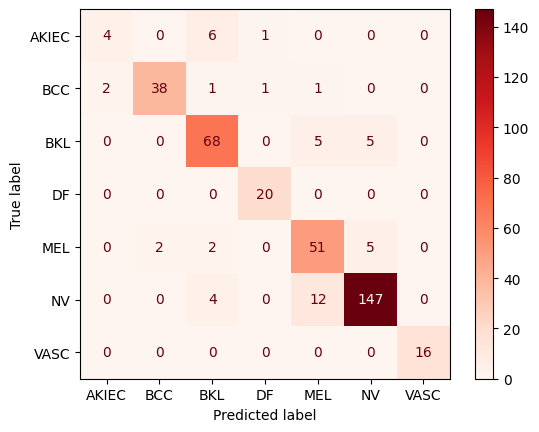

In [47]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
ava_labels = [AKIEC, BCC, BKL, DF, MEL, NV, VASC]
true_labels = flow_test.classes
predictions = model_eff.predict(flow_test)
y_true = true_labels
y_pred = np.array([np.argmax(x) for x in predictions])
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=ava_labels)
disp.plot(cmap=plt.cm.Reds)
plt.show()

In [ ]:
custom_model = 0

By Severity

In [ ]:
SEVERITY_DATA_FOLDER_PATH = "grouped_images_by_severity"
BENIGN_DATA_FOLDER_PATH = "grouped_images_by_severity\\benign\\*"
MALIGNANT_DATA_FOLDER_PATH = "grouped_images_by_severity\\malignant\\*"
TARGET_SIZE = (256, 256)
INPUT_SHAPE = (256, 256, 3)
BATCH_SIZE = 20

In [ ]:
imgs_benign = glob.glob(BENIGN_DATA_FOLDER_PATH)
imgs_malignant = glob.glob(MALIGNANT_DATA_FOLDER_PATH)

df_benign = pd.DataFrame({'filename': imgs_benign})
df_benign['class'] = 'benign'
df_malignant = pd.DataFrame({'filename': imgs_malignant})
df_malignant['class'] = 'melignant'

df = pd.concat([df_benign, df_malignant])

df_train, df_temp = train_test_split(df, stratify=df['class'], test_size=.1)
df_val, df_test = train_test_split(df_temp, stratify=df_temp['class'], test_size=.5)


In [ ]:

data_generator_vis = ImageDataGenerator()
flow_vis = data_generator_vis.flow_from_directory(
    SEVERITY_DATA_FOLDER_PATH,
    shuffle=True
)

In [ ]:
data_generator_train = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=90,
    shear_range=.1,
    brightness_range=[0.6, 1.0]
)

data_generator_val = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

data_generator_test = ImageDataGenerator(
    preprocessing_function=preprocess_input
)


In [ ]:
flow_train = data_generator_train.flow_from_dataframe(
    df_train,
    target_size=TARGET_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True
)

flow_val = data_generator_val.flow_from_dataframe(
    df_val,
    target_size=TARGET_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True
    
)

flow_test = data_generator_test.flow_from_dataframe(
    df_test,
    target_size=TARGET_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True
)



In [ ]:
CLASS_MAP = {class_number: class_name.split('.')[0] for class_name, class_number in flow_vis.class_indices.items()}

In [ ]:
EfficientNet = EfficientNetV2S(
    include_top=False,
    weights='imagenet',
    input_shape=INPUT_SHAPE,
    pooling='max'
)

In [ ]:
def get_model(base_model, activation="softmax", optimizer: str="adam", loss_function: str="CategoricalCrossentropy"):
    model = Sequential([
        base_model,
        Dropout(.2),
        Dense(2, activation=activation)
    ])
    
    for layer in model.layers[:-1]:
        layer.trainable=True
        
    model.compile(
        optimizer,
        loss_function,
        metrics=[
            "accuracy"
        ]
    )
    
    return model

In [ ]:
model_eff = get_model(EfficientNet)

In [ ]:
model_eff.summary()

In [ ]:
history_rsnet = model_eff.fit(
    flow_train,
    validation_data=flow_val,
    epochs=1
)

In [ ]:
_, resnet_accuracy = model_eff.evaluate(flow_test)

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(history_rsnet.history["accuracy"])
plt.plot(history_rsnet.history["val_accuracy"])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(history_rsnet.history["loss"])
plt.plot(history_rsnet.history["val_loss"])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()


In [ ]:
from keras import Model
Model.save(
    model_eff,
    filepath=".\\model\\experimental_model_severity_full90prc_S5.h5",
    overwrite=True,
    include_optimizer=True,
    save_format=None,
    signatures=None,
    options=None,
    save_traces=True,
)